# Configurações e treinamento da rede neural

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sagemaker
from sagemaker import get_execution_role

In [21]:
bucket = 'sprint4-cifar10'
subfolder = 'cifar10'
session = sagemaker.Session()
role = get_execution_role()
region = session.boto_session.region_name
base_train = 's3://sagemaker-sample-data-{}/tensorflow/cifar10'.format(region)
output_location = 's3://{}/{}/output-tf'.format(bucket, subfolder)
print('Localização da base de treinamento: ', base_train)
print('Região: ', region)
print('Localização do modelo: ', output_location)

Localização da base de treinamento:  s3://sagemaker-sample-data-us-east-1/tensorflow/cifar10
Região:  us-east-1
Localização do modelo:  s3://sprint4-cifar10/cifar10/output-tf


In [24]:
# https://sagemaker.readthedocs.io/en/stable/frameworks/tensorflow/sagemaker.tensorflow.html
from sagemaker.tensorflow import TensorFlow
cifar10_tensorflow = TensorFlow(entry_point = "cifar10.py",
                              role = role,
                              instance_count = 1,
                              instance_type = 'ml.c5.xlarge',
                              framework_version = '2.10',
                              py_version = 'py39',
                              output_path = output_location,
                              hyperparameter = {'epochs': 10, 'batch_size': 128, 
                                                'learning-rate': 0.0001})

In [25]:
cifar10_tensorflow.fit(base_train)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: tensorflow-training-2023-04-17-10-57-56-766


2023-04-17 10:57:57 Starting - Starting the training job...
2023-04-17 10:58:13 Starting - Preparing the instances for training...
2023-04-17 10:58:54 Downloading - Downloading input data......
2023-04-17 10:59:34 Training - Downloading the training image..
2023-04-17 11:00:05 Training - Training image download completed. Training in progress.2023-04-17 11:00:10.125268: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 11:00:10.218659: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2023-04-17 11:00:10.219179: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future rec

# Deploy e previsões

In [31]:
classificador_cifar10 = cifar10_tensorflow.deploy(initial_instance_count = 1,
                                              instance_type = 'ml.m5.large')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.tensorflow.model:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating model with name: tensorflow-training-2023-04-17-11-08-53-514
INFO:sagemaker:Creating endpoint-config with name tensorflow-training-2023-04-17-11-08-53-514
INFO:sagemaker:Creating endpoint with name tensorflow-training-2023-04-17-11-08-53-514


-----!

In [52]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [51]:
type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [89]:
x_test[10]

array([[[ 90, 124, 149],
        [ 90, 124, 149],
        [ 91, 125, 150],
        ...,
        [103, 131, 148],
        [100, 128, 146],
        [100, 129, 146]],

       [[ 92, 127, 153],
        [ 93, 127, 152],
        [ 94, 128, 153],
        ...,
        [114, 137, 151],
        [103, 130, 148],
        [102, 132, 152]],

       [[ 93, 128, 153],
        [ 93, 127, 152],
        [ 94, 128, 152],
        ...,
        [114, 133, 145],
        [103, 129, 147],
        [101, 132, 152]],

       ...,

       [[101, 133, 154],
        [101, 132, 153],
        [102, 133, 154],
        ...,
        [ 94, 124, 150],
        [ 92, 122, 148],
        [ 91, 122, 148]],

       [[100, 131, 153],
        [101, 132, 153],
        [102, 133, 154],
        ...,
        [ 93, 123, 149],
        [ 90, 120, 146],
        [ 90, 121, 147]],

       [[ 99, 130, 152],
        [100, 130, 151],
        [101, 132, 153],
        ...,
        [ 92, 122, 148],
        [ 90, 120, 146],
        [ 89, 120, 146]]

In [87]:
y_test[10]

array([0], dtype=uint8)

In [91]:
x_test[10].shape

(32, 32, 3)

In [90]:
from PIL import Image
im = Image.fromarray(x_test[5])
im.save("cifar10_test_image_10.png")

In [93]:
x_test_reshaped = np.expand_dims(x_test[10], axis=0)
pred = classificador_cifar10.predict(x_test[10][np.newaxis, ...])

In [94]:
def show_test(number, true_class):
    fig = plt.figure(figsize=(3, 3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = classificador_cifar10.predict(test_image)
    predicted_class = np.argmax(test_result)
    plt.imshow(x_test[number])
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[predicted_class], labels[true_class]))


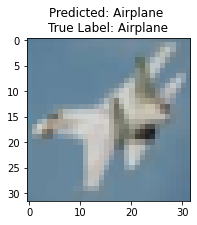

In [95]:
show_test(10, int(y_test[10]))

